<a href="https://colab.research.google.com/github/AbhishekChamarajanagar/Abhi/blob/master/Copy_of_Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
from scipy.stats import norm, skew
from collections import Counter
%matplotlib inline

In [ ]:
prices_train = pd.read_csv("train.csv")
prices_test = pd.read_csv("test.csv")

In [ ]:
prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
prices_train.shape, prices_test.shape

((1460, 81), (1459, 80))

In [ ]:
prices_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
prices_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
prices_train['LotFrontage'].fillna(int(prices_train['LotFrontage'].mean()), inplace=True)
prices_train['GarageYrBlt'].fillna(int(prices_train['GarageYrBlt'].mean()), inplace=True)

In [ ]:
number_of_missing = prices_train.isnull().sum().sort_values()
percent_of_missing = ((prices_train.isnull().sum() / prices_train.isnull().count())*100).sort_values()
missing_train_df = pd.concat([number_of_missing,  percent_of_missing], keys = ['total number of missing data', 'total percent of missing data'], axis = 1)
prices_train = prices_train.drop((missing_train_df[missing_train_df['total number of missing data'] > 5]).index, axis = 1)
prices_train.isnull().sum().sort_values(ascending = False)

,0
Electrical,1
CentralAir,0
1stFlrSF,0
2ndFlrSF,0
LowQualFinSF,0
...,...
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0


In [ ]:
prices_train['Electrical'].fillna(prices_train['Electrical'].value_counts().index[0], inplace = True)

In [ ]:
prices_test['LotFrontage'].fillna(int(prices_test['LotFrontage'].mean()), inplace=True)
prices_test['MasVnrArea'].fillna(int(prices_test['MasVnrArea'].mean()), inplace=True)

In [ ]:
number_of_missing = prices_test.isnull().sum().sort_values()
percent_of_missing = ((prices_test.isnull().sum() / prices_test.isnull().count())*100).sort_values()
missing_test_df = pd.concat([number_of_missing,  percent_of_missing], keys = ['total number of missing data', 'total percent of missing data'], axis = 1)
prices_test = prices_test.drop((missing_test_df[missing_test_df['total number of missing data'] > 5]).index, axis = 1)
prices_test.isnull().sum().sort_values(ascending = False)

,0
MSZoning,4
Functional,2
BsmtFullBath,2
Utilities,2
BsmtHalfBath,2
...,...
ExterCond,0
Foundation,0
MSSubClass,0
HeatingQC,0


In [ ]:
for i in prices_test.columns:
    if (prices_test[i].isnull().sum())>0:
        prices_test[i].fillna(prices_test[i].value_counts().index[0], inplace = True)

In [ ]:
print("The number of NULL values in train data is {0}, and the number of NULL values in test data is {1}".
      format(prices_train.isnull().sum().sum(), prices_test.isnull().sum().sum()))

The number of NULL values in train data is 0, and the number of NULL values in test data is 0


In [ ]:
max = 0
x=0
for i in prices_train.select_dtypes(include=np.number).drop(['SalePrice'],axis=1).columns:
    if (prices_train[i].corr(prices_train['SalePrice'])) > max:
        max = prices_train[i].corr(prices_train['SalePrice'])
        x = i
print("The column which has the maximum correlation with the SalePrice is: {0}" .
      format(x))

The column which has the maximum correlation with the SalePrice is: OverallQual


In [ ]:
arr=[]
for i in prices_train.columns:
    arr.append(len(prices_train[i].value_counts()))
value_counts_df = pd.concat([pd.Series(prices_train.columns), pd.Series(arr)], keys = ['column name', 'number of unique values in that column'], axis = 1)

In [ ]:
value_counts_df.sort_values('number of unique values in that column').head(23)

,column name,number of unique values in that column
33,CentralAir,2
5,Street,2
8,Utilities,2
42,HalfBath,3
52,PavedDrive,3
40,BsmtHalfBath,3
10,LandSlope,3
45,KitchenQual,4
24,ExterQual,4
48,Fireplaces,4


<ipython-input-32-be1fc01fe3ae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "SaleCondition",


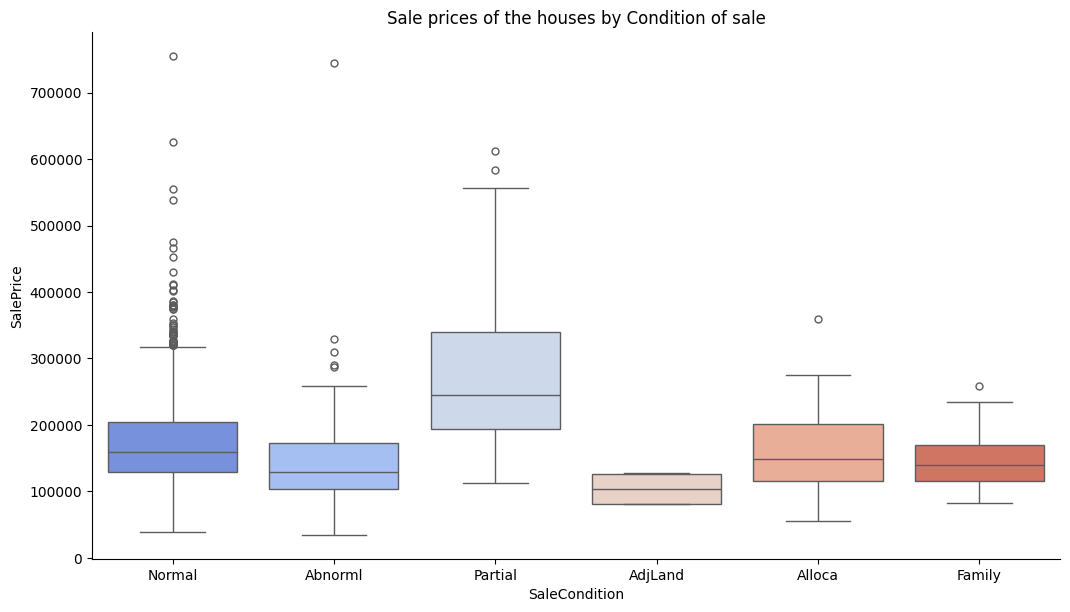

In [ ]:
sns.catplot(x = "SaleCondition",
            y = "SalePrice",
            kind = "box",
            height = 6,
            aspect = 1.8,
            palette ='coolwarm' ,
            data = prices_train).set(title = "Sale prices of the houses by Condition of sale");

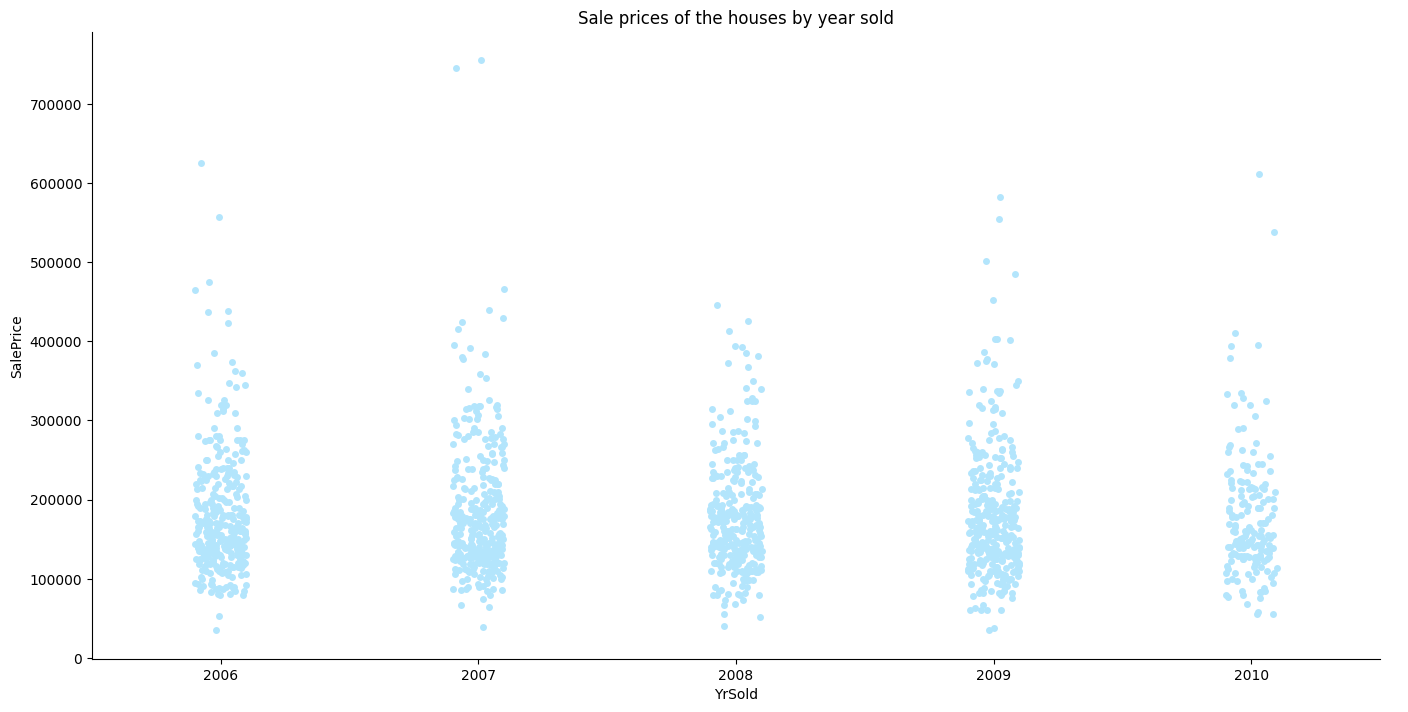

In [ ]:
sns.catplot(x = "YrSold",
            y = "SalePrice",
            kind = "strip",
            height = 7,
            aspect = 2,
            color = "#B3E5FC",
            data = prices_train).set(title = "Sale prices of the houses by year sold");

In [ ]:
fig = px.histogram(prices_train,
                   x = "MoSold",
                   y = "SalePrice",
                   marginal = None,
                   color = "YrSold",
                   text_auto = True,
                   hover_data  = prices_train.columns,
                   height = 500, width = 800)
fig.show()

In [ ]:
fig = px.density_heatmap(prices_train, x = "Foundation", y = "SalePrice", marginal_x = "rug",
                         marginal_y = "histogram", height = 500, width = 830, text_auto = True,
                         title = "Density heatmap between Type of foundation and SalePrice")
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
X = prices_train.loc[: , prices_train.columns != 'SalePrice']
Y = prices_train['SalePrice']
X_train, x_valid, Y_train, y_valid = train_test_split(X, Y, test_size=0.30, random_state=101)

NameError: name 'preds' is not defined

In [ ]:
obj_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
low_cardinality_cols = [col for col in obj_cols if X_train[col].nunique() < 10]
high_cardinality_cols = [col for col in obj_cols if X_train[col].nunique() > 10]
print('categorical cols that will be one hot encoded : ', low_cardinality_cols)
print('categorical cols that will been dropped : ', high_cardinality_cols)

categorical cols that will be one hot encoded :  ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
categorical cols that will been dropped :  ['Neighborhood', 'Exterior1st', 'Exterior2nd']


In [ ]:
ohe= OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(ohe.fit_transform(X_train[low_cardinality_cols]))
oh_cols_valid = pd.DataFrame(ohe.transform(x_valid[low_cardinality_cols]))

oh_cols_train.index = X_train.index
oh_cols_valid.index = x_valid.index

num_X_train = X_train.drop(obj_cols, axis=1)
num_x_valid = x_valid.drop(obj_cols, axis=1)

oh_X_train = pd.concat([num_X_train,oh_cols_train], axis=1)
oh_x_valid = pd.concat([num_x_valid,oh_cols_valid], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

